In [ ]:
from scripts.generate_pseudomultimer_dataset import (
    locate_cif_file,
    load_structure,
    get_sequence,
    slice_sequence_by_residue_range,
    build_dataset,
    get_ca_atoms,
)
from pathlib import Path
import json

# Path to features JSON
features_path = Path.cwd().parent / "DATA/pdb_features.json"
project_root = Path.cwd()  # base_dir for locate_cif_file

# Load JSON into a separate variable (avoid shadowing the path)
with open(features_path, "r") as f:
    features_data = json.load(f)

# Resolve CIF path and load structure
cif_path = locate_cif_file(pdb_id="1A2P", base_dir=project_root, pdb_features=features_data)
print("CIF path:", cif_path)

struct = load_structure(cif_path)
print("Loaded struct:", type(struct).__name__ if struct is not None else None)

# Option A: Get entire chain sequences as a dict {chain_id: seq}
all_chain_seqs = get_sequence(struct)
print("Chain A (full) length:", len(all_chain_seqs.get("A", "")))

# Option B: Get a sliced subsequence by residue numbers (inclusive)
subseq = slice_sequence_by_residue_range(struct, chain_id="A", start_res=3, end_res=5)
print("Sliced A[3..5]:", subseq)

get_ca_atoms(load_structure(cif_path), chain_id="A", start_res=3, end_res=5)

# build_dataset(pdb_features= features_data, base_dir= project_root)

In [ ]:
from scripts.generate_pseudomultimer_dataset import main

output_path_links = "/home/jovyan/workspace/DATA/training.links.txt.gz"
output_path_seqs = "/home/jovyan/workspace/DATA/training.seqs.txt.gz"
output_path_contact_masks = "/home/jovyan/workspace/DATA/training.contact_masks.pkl.gz"
main(
    links_output_path=output_path_links,
    seqs_output_path=output_path_seqs,
    contact_masks_ouput_path=output_path_contact_masks,
)

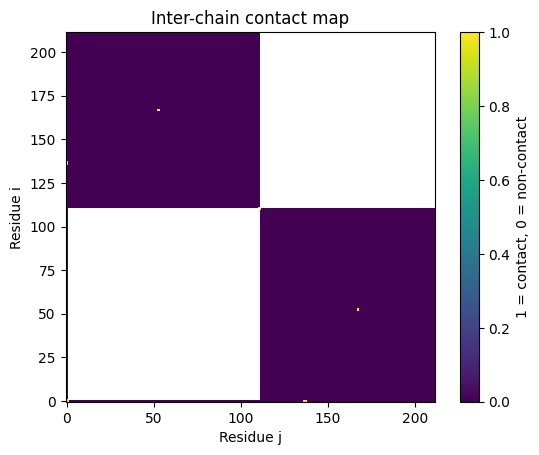

In [8]:
from mint.data.mint import PseudoMMDataset
from mint.data.mint import PseudoMMDataModule
import matplotlib.pyplot as plt
import numpy as np

test = PseudoMMDataset(
    links_path="/home/jovyan/workspace/DATA/training.links.txt.gz",
    seqs_path="/home/jovyan/workspace/DATA/training.seqs.txt.gz",
    contact_masks_path="/home/jovyan/workspace/DATA/training.contact_masks.pkl.gz",
)

y = test.__getitem__(221)[-1]

plot_arr = y.astype(float)
plot_arr[y == -1] = np.nan

plt.figure()
im = plt.imshow(plot_arr, origin="lower", interpolation="none")  # show as image
plt.title("Inter-chain contact map")
plt.xlabel("Residue j")
plt.ylabel("Residue i")
cbar = plt.colorbar(im)
cbar.set_label("1 = contact, 0 = non-contact")

plt.show()

In [ ]:
from mint.data.mint import PseudoMMDataModule
from omegaconf import OmegaConf

cfg = "/home/jovyan/workspace/mint/src/mint/configs/all_configs.yaml"
cfg = OmegaConf.load(cfg)

cfg.meta.code_base_dir = "/home/jovyan/workspace/mint"
cfg.meta.data_dir = "/home/jovyan/workspace/DATA"


test_loader = PseudoMMDataModule(config=cfg)

# Get the PyTorch DataLoader from your DataModule
loader = test_loader.train_dataloader()

# Get the first batch
batch = next(iter(loader))

print(batch)

print(batch[0].shape)

[tensor([[ 0, 16,  8,  7,  4,  8, 16,  8, 14,  5, 12,  4,  8,  5,  8, 14,  6,  9,
         15,  7, 12, 20, 11, 23,  8, 14,  8,  8,  8,  7,  8, 19, 20, 16, 22, 19,
         16, 16, 15, 14,  6,  8,  8, 14, 15, 14, 22, 12, 19,  8, 11,  8, 17,  4,
          5,  8,  6,  7, 14,  6, 10, 18,  8,  6,  6,  6,  8,  6, 11,  8, 18,  8,
          4, 11, 12,  8,  6,  7,  9,  5,  9, 13,  5,  5, 11, 19, 19, 23, 16, 16,
         19,  8,  8, 21, 14,  4, 11, 18,  6,  6,  6, 11, 15,  4,  9,  4, 15, 10,
          2,  0,  5, 13,  5,  5, 14, 11,  7,  8, 12, 18, 14, 14,  8,  8,  9, 16,
          4, 11,  8,  6,  6,  5,  8,  7,  7, 23, 18,  4, 17, 17, 18, 19, 14, 15,
         13, 12, 17,  7, 15, 22, 15, 12, 13,  6,  8,  9, 10, 16, 17,  6,  7,  4,
         17,  8, 22, 11, 13, 16, 13,  8, 15, 13,  8, 11, 19,  8, 20,  8,  8, 11,
          4, 11,  4, 11, 15, 13,  9, 19,  9, 10, 21, 17,  8, 19, 11, 23,  9,  5,
         11, 21, 15, 11,  8, 11,  8, 14, 12,  7, 15,  8, 18, 17, 10,  2]]), tensor([[0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from mint.model.mint import MINT

my_model = MINT(cfg=cfg)

loss, output = my_model.forward(batch)

print(output)

{}
